<a href="https://colab.research.google.com/github/kimhyoryeong/ml_edu/blob/master/samsungcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 드라이브 연결 및 파일 불러오기


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 깨짐 처리

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/samsungcard' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/samsungcard


In [ ]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/samsungcard


### 전체 데이터

In [ ]:
data =  pd.read_csv('trend_w_demo.csv',encoding='CP949')
data

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid
3,202005,뷰티,0,D,mid,mid,mid,mid,low,low
4,202005,오픈마켓/소셜,0,G,high,low,mid,mid,mid,low
...,...,...,...,...,...,...,...,...,...,...
452033,201904,전문몰,0,E,low,mid,low,low,low,low
452034,201904,할인점,0,H,high,low,low,low,low,low
452035,201904,할인점,1,H,high,low,low,low,low,low
452036,201904,할인점,0,H,high,low,low,low,low,low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


In [ ]:
data.shape

(452038, 10)

In [ ]:
mdata=data[data.YM==201904] 
#2019년 4월 data

In [ ]:
del mdata['YM'] #4월 데이터로 전체 동일 하므로 연도 삭제

In [ ]:
mdata.shape

(120119, 9)


## 2019년 4월 카드사용 Data


In [ ]:
mdata['연령대'].value_counts() 
#연령별 인원

D    20653
A    18540
F    18393
E    15278
C    15032
G    13083
H     9701
B     9439
Name: 연령대, dtype: int64

 - mdata

## 기혼스코어가 low인 데이터


In [ ]:
unmarried=mdata[mdata.기혼스코어=='low']


- unmarried
- 연령대는 E와 C 그룹만 존재

### 기혼스코어 낮은 사람들의 유아자녀 스코어


In [ ]:
unmarried[unmarried.유아자녀스코어=='low']['연령대'].value_counts()


E    5250
C      20
Name: 연령대, dtype: int64

In [ ]:
unmarried[unmarried.유아자녀스코어=='mid']['연령대'].value_counts()


E    3549
C      69
Name: 연령대, dtype: int64

In [ ]:
unmarried[unmarried.유아자녀스코어=='high']['연령대'].value_counts()
# c는 미혼인 사람중 유아자녀가 high 인 사람은 없다.


E    58
Name: 연령대, dtype: int64

- 유아자녀 스코어가 high인 c그룹은 없음

### 기혼스코어 낮은 사람들의 초등자녀 스코어


In [ ]:
unmarried[unmarried.초등학생자녀스코어=='low']['연령대'].value_counts()
# 미혼인 사람들은 e와 c그룹이 있는데 e의 모든 사람이 초등학생 자녀가 없다.

E    8857
C      39
Name: 연령대, dtype: int64

In [ ]:
unmarried[unmarried.초등학생자녀스코어=='mid']['연령대'].value_counts()
# 미혼인 사람들 중 초등학생 자녀가 있을 가능성이 높은 사람은 없고 애매한 사람은 c그룹이 있다.

C    50
Name: 연령대, dtype: int64

In [ ]:
unmarried[unmarried.초등학생자녀스코어=='high']['연령대'].value_counts()

Series([], Name: 연령대, dtype: int64)

In [ ]:
unmarried[unmarried.중고생자녀스코어=='low']['연령대'].value_counts()

E    8857
C      89
Name: 연령대, dtype: int64

In [ ]:
unmarried[unmarried.대학생자녀스코어=='low']['연령대'].value_counts()

E    8857
C      89
Name: 연령대, dtype: int64

- e그룹은 전부 초등학생 자녀가 스코어가 low이다.
- 초등자녀 스코어가 high 인 c 그룹은 없다.

In [ ]:
# 미혼인 사람을 분석해본 결과 미혼의 사람들은 e그룹과 c그룹이 있는데 e그룹은 유아자녀가 있을 수 있고 c그룹은 적지만 초등자녀까지 있을 수 있다.

## 기혼스코어가 mid 인 데이터


In [ ]:
mdata[mdata.기혼스코어=='mid']['연령대'].value_counts()

C    12186
D    10413
E     5736
Name: 연령대, dtype: int64

In [ ]:
ambiguous=mdata[mdata.기혼스코어=='mid']
ambiguous['연령대'].value_counts()

C    12186
D    10413
E     5736
Name: 연령대, dtype: int64

- ambiguous
- C , D , E 그룹


### 기혼스코어가 mid인 사람중 유아자녀스코어


In [ ]:
ambiguous[ambiguous.유아자녀스코어=='low']['연령대'].value_counts()

E    567
D    331
C    299
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.유아자녀스코어=='mid']['연령대'].value_counts()

C    9853
D    9043
E    4599
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.유아자녀스코어=='high']['연령대'].value_counts()

C    2034
D    1039
E     570
Name: 연령대, dtype: int64

- c그룹이 가장 많다.

### 기혼스코어가 mid인 사람중 초등자녀스코어


In [ ]:
ambiguous[ambiguous.초등학생자녀스코어=='low']['연령대'].value_counts()

E    5736
C    1063
D      22
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.초등학생자녀스코어=='mid']['연령대'].value_counts()

C    6000
D    2336
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.초등학생자녀스코어=='high']['연령대'].value_counts()

D    8055
C    5123
Name: 연령대, dtype: int64

- e 그룹은 유아자녀 스코어는 보이지만 초등자녀 스코어가 전부 low이기 때문에 8세이상의 아이를 가지지 않은 가장 낮은 연령대로 볼 수 있다.

### 기혼스코어가 mid인 사람중 중고생 자녀스코어


In [ ]:
ambiguous[ambiguous.중고생자녀스코어=='low']['연령대'].value_counts()
#결혼이 모호한 사람들중 c,e그룹은 중고생 이상 자녀가 없다.


C    12186
E     5736
D       28
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.중고생자녀스코어=='mid']['연령대'].value_counts()

D    10279
Name: 연령대, dtype: int64

In [ ]:
ambiguous[ambiguous.중고생자녀스코어=='high']['연령대'].value_counts()

D    106
Name: 연령대, dtype: int64

- C 그룹은 초등자녀 스코어는 보이지만 중고생 이상의 자녀가 전부 low이기 때문에 14세 이상의 아이를 가지지 못한 e그룹 다음 연령대로 볼 수 있다

### 기혼스코어가 mid인 사람중 대학생 자녀스코어


In [ ]:
ambiguous[ambiguous.대학생자녀스코어=='low']['연령대'].value_counts()
#대학생 이상의 자녀는 결혼이 모호한 d그룹중 아무도 없음

C    12186
D    10413
E     5736
Name: 연령대, dtype: int64

- 기혼스코어가 mid인 C, D, E그룹중 대학생자녀는 모두 없기 때문에 20세 이상의 자녀를 가지지 않은 연령대로 볼수 있다. 그리고 기혼율도 낮은 3그룹이기 때문에 가장 낮은 연령대 일 것이다.
- e < c < d.

## 기혼 스코어가 high 인 데이터
- married



In [ ]:
mdata[mdata.기혼스코어=='high']['연령대'].value_counts()

A    18540
F    18393
G    13083
D    10240
H     9701
B     9439
C     2757
E      685
Name: 연령대, dtype: int64

In [ ]:
married=mdata[mdata.기혼스코어=='high']

- 모든 그룹이 있다.

### 기혼스코어가 high 인 사람의 유아자녀스코어
- b,g,h는 유아 자녀가 없으므로 가장 높은 연령대의 그룹들 일 가능성이 높다.


In [ ]:
married[married.유아자녀스코어=='low']['연령대'].value_counts()
#기혼스코어가 high인 사람중 c 그룹은 유아자녀 low인 값이 없다.

F    16579
G    13083
H     9701
B     9439
A     6653
E      122
D       61
Name: 연령대, dtype: int64

In [ ]:
married[married.유아자녀스코어=='mid']['연령대'].value_counts()

A    11225
D     7575
F     1808
C     1546
E      461
Name: 연령대, dtype: int64

In [ ]:
married[married.유아자녀스코어=='high']['연령대'].value_counts()
#기혼스코어가 high인 사람중 b, g, h 그룹은 유아자녀 mid, high인 값이 없다.

D    2604
C    1211
A     662
E     102
F       6
Name: 연령대, dtype: int64

### 기혼스코어가 high 인 사람의 초등자녀스코어
- h그룹이 초등자녀스코어가 모두 low이므로 가장 높은 연령대로 볼 수 있다.


In [ ]:
married[married.초등학생자녀스코어=='low']['연령대'].value_counts()
#기혼스코어가 high인 사람중 a와 d 그룹은 초등학생 자녀스코어가 low인 사람이 없다.


H    9701
B    2164
G    1113
E     685
F     167
C      34
Name: 연령대, dtype: int64

In [ ]:
married[married.초등학생자녀스코어=='mid']['연령대'].value_counts()


G    7726
B    6122
F    4865
A    1478
C     749
D     584
Name: 연령대, dtype: int64

In [ ]:
married[married.초등학생자녀스코어=='high']['연령대'].value_counts()
# 초등자녀 스코어가 mid or high인 h그룹은 없음

A    17062
F    13361
D     9656
G     4244
C     1974
B     1153
Name: 연령대, dtype: int64

### 기혼스코어가 high 인 사람의 중고생자녀스코어

In [ ]:
married[married.중고생자녀스코어=='low']['연령대'].value_counts()


H    9701
C    2757
E     685
B     323
F      63
G      59
A      30
Name: 연령대, dtype: int64

In [ ]:
married[married.중고생자녀스코어=='mid']['연령대'].value_counts()


A    14973
F    14779
G    12490
D     9439
B     9083
Name: 연령대, dtype: int64

In [ ]:
married[married.중고생자녀스코어=='high']['연령대'].value_counts()

F    3551
A    3537
D     801
G     534
B      33
Name: 연령대, dtype: int64

### 기혼스코어가 high 인 사람의 대학생 자녀스코어

In [ ]:
married[married.대학생자녀스코어=='low']['연령대'].value_counts()


A    14755
D    10240
F     9242
H     8636
B     5409
G     4645
C     2757
E      685
Name: 연령대, dtype: int64

In [ ]:
married[married.대학생자녀스코어=='mid']['연령대'].value_counts()

F    8923
G    7823
B    3811
A    3782
H    1061
Name: 연령대, dtype: int64

In [ ]:
married[married.대학생자녀스코어=='high']['연령대'].value_counts()

G    615
F    228
B    219
H      4
A      3
Name: 연령대, dtype: int64

## 남자는 전업주부가 없다.

In [ ]:
mdata[mdata.성별구분==0]['전업주부스코어'].value_counts()
#남자는 전업주부가 없음

low    56183
Name: 전업주부스코어, dtype: int64

In [ ]:
mdata[mdata.성별구분==1]['전업주부스코어'].value_counts()


mid     53075
high     6308
low      4553
Name: 전업주부스코어, dtype: int64

## 남여 기혼스코어 비율은 유사하다.

In [ ]:
mdata[mdata.성별구분==0]['기혼스코어'].value_counts()

high    39377
mid     13074
low      3732
Name: 기혼스코어, dtype: int64

In [ ]:
mdata[mdata.성별구분==1]['기혼스코어'].value_counts()

high    43461
mid     15261
low      5214
Name: 기혼스코어, dtype: int64

## 어린 연령대의 남자들은 여자들에 비해 카드사용자 수가 낮다.


In [ ]:
mdata[mdata.연령대=='E']['성별구분'].value_counts()

1    9094
0    6184
Name: 성별구분, dtype: int64

In [ ]:
mdata[mdata.연령대=='C']['성별구분'].value_counts()

1    8077
0    6955
Name: 성별구분, dtype: int64

In [ ]:
mdata[mdata.연령대=='D']['성별구분'].value_counts()

1    10760
0     9893
Name: 성별구분, dtype: int64

- e c 그룹은 차이가 있고 d의 나이대 부터 남여 카드 사용자 비율이 비슷하다.

## Category 별 카드 사용자 수


In [ ]:
mdata['Category'].value_counts()


전문몰        30911
할인점        26721
디저트        22918
오픈마켓/소셜    18766
뷰티          5734
취미          5469
종합몰         4189
호텔/숙박       2332
항공/여행사      2132
면세점          947
Name: Category, dtype: int64

- 모든 연령대로 분석해 봤을 때 
1. 전문몰
2. 할인점
3. 디저트
4. 오픈마켓/소셜
- 순으로 카드 소비자 수가 많다. 그 이후의 카테고리에서는 이용자수의 큰 차이가 있다.

###Category 별 남여 카드 사용자 수


In [ ]:
mdata[mdata.성별구분==0]['Category'].value_counts()


전문몰        14765
할인점        12789
디저트        10616
오픈마켓/소셜     8292
취미          3371
뷰티          1893
호텔/숙박       1538
종합몰         1333
항공/여행사      1084
면세점          502
Name: Category, dtype: int64

In [ ]:
mdata[mdata.성별구분==1]['Category'].value_counts()

전문몰        16146
할인점        13932
디저트        12302
오픈마켓/소셜    10474
뷰티          3841
종합몰         2856
취미          2098
항공/여행사      1048
호텔/숙박        794
면세점          445
Name: Category, dtype: int64

- 상위 카데고리를 제외하고
- 남자는 취미 여자는 뷰티에 관심이 많다.

## E,C,D 연령대의 카드 사용 카데고리 분석


In [ ]:
mdata[mdata.연령대=='E']['Category'].value_counts()

전문몰        4125
디저트        3130
오픈마켓/소셜    2672
할인점        1686
뷰티         1276
취미         1025
종합몰         499
호텔/숙박       391
항공/여행사      339
면세점         135
Name: Category, dtype: int64

In [ ]:
mdata[mdata.연령대=='C']['Category'].value_counts()


전문몰        3992
오픈마켓/소셜    2951
디저트        2799
할인점        2518
뷰티          736
종합몰         720
취미          579
호텔/숙박       305
항공/여행사      292
면세점         140
Name: Category, dtype: int64

In [ ]:
mdata[mdata.연령대=='D']['Category'].value_counts()

전문몰        5376
할인점        4036
오픈마켓/소셜    4016
디저트        3802
종합몰        1055
뷰티          733
취미          728
호텔/숙박       392
항공/여행사      372
면세점         143
Name: Category, dtype: int64

- E 그룹은 (가장 낮은 연령대의 사람들) 1-4위까지 카데고리 순위는 변동이 없지만
- 뷰티부분의 카드 사용자가 힐인점과 유사할 정도로 높고
- 디저트에 카드 사용량이 다른 연령대와 상대적으로 높다.

## E연령대의 남여 카드 사용 카데고리 순위 비교
- E연령대 twenty
- 상위 4개의 카데고리는 동일하나 5위권의 카데고리가 4위와 유사할 정도로 E연령대의 여자들의 뷰티 카데고리 카드사용량이 높고 남자들은 취미 카데고리의 카드 사용량이 높다.



In [ ]:
twenty=mdata[mdata.연령대=='E']


In [ ]:
twenty[twenty.성별구분==0]['Category'].value_counts()

전문몰        1742
디저트        1294
오픈마켓/소셜     945
할인점         702
취미          658
뷰티          320
호텔/숙박       243
항공/여행사      122
종합몰         106
면세점          52
Name: Category, dtype: int64

In [ ]:
twenty[twenty.성별구분==1]['Category'].value_counts()

전문몰        2383
디저트        1836
오픈마켓/소셜    1727
할인점         984
뷰티          956
종합몰         393
취미          367
항공/여행사      217
호텔/숙박       148
면세점          83
Name: Category, dtype: int64

- 상위 4개의 카데고리는 동일하나 5위권의 카데고리가 4위와 유사할 정도로 E연령대의 여자들의 뷰티 카데고리 카드사용량이 높고 남자들은 취미 카데고리의 카드 사용량이 높다.



## C연령대의 남여 카드 사용 카데고리 순위 비교


In [ ]:
twenty2=mdata[mdata.연령대=='C']


In [ ]:
twenty2[twenty2.성별구분==0]['Category'].value_counts()

전문몰        1891
디저트        1339
오픈마켓/소셜    1280
할인점        1205
취미          395
뷰티          260
종합몰         197
호텔/숙박       191
항공/여행사      122
면세점          75
Name: Category, dtype: int64

In [ ]:
twenty2[twenty2.성별구분==1]['Category'].value_counts()

전문몰        2101
오픈마켓/소셜    1671
디저트        1460
할인점        1313
종합몰         523
뷰티          476
취미          184
항공/여행사      170
호텔/숙박       114
면세점          65
Name: Category, dtype: int64

- 1-4위의 카데고리는 같고 하위 카데고리의 순위는 차이가 있지만 
- 상위 카테고리 기준으로 봤을 때 전체 연령대와 큰 차이가 없다.

## D 연령대의 남여 카드 사용 카데고리 순위 비교

In [ ]:
twenty3=mdata[mdata.연령대=='C']


In [ ]:
twenty3[twenty3.성별구분==0]['Category'].value_counts()

전문몰        1891
디저트        1339
오픈마켓/소셜    1280
할인점        1205
취미          395
뷰티          260
종합몰         197
호텔/숙박       191
항공/여행사      122
면세점          75
Name: Category, dtype: int64

In [ ]:
twenty3[twenty3.성별구분==1]['Category'].value_counts()

전문몰        2101
오픈마켓/소셜    1671
디저트        1460
할인점        1313
종합몰         523
뷰티          476
취미          184
항공/여행사      170
호텔/숙박       114
면세점          65
Name: Category, dtype: int64

- 1-4위의 카데고리는 같고 하위 카데고리의 순위는 차이가 있지만 
- 상위 카테고리 기준으로 봤을 때 전체 연령대와 큰 차이가 없다.

In [ ]:
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

## 데이터 시각화


### 연령대 구분


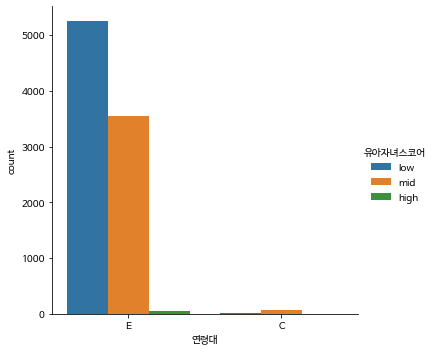

In [ ]:
sns.catplot(x='연령대' ,hue="유아자녀스코어", kind="count", data=unmarried)

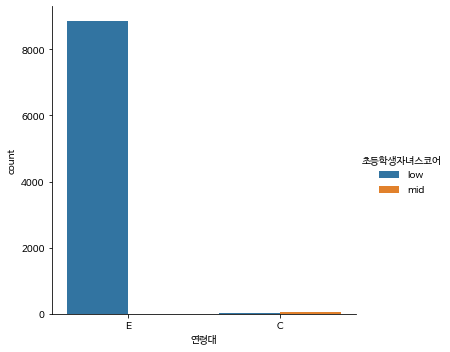

In [ ]:
sns.catplot(x='연령대' ,hue="초등학생자녀스코어", kind="count", data=unmarried)

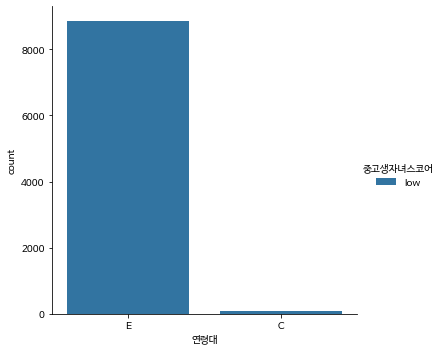

In [ ]:
sns.catplot(x='연령대' ,hue="중고생자녀스코어", kind="count", data=unmarried)

- 미혼가능성이 low인 연령대는 E 와 C 그룹이 있는데 E 그룹이 대다수를 차지 하고 있다. 
- 미혼일 가능성이 있을 수록 낮은 나이라고 봤을 때 E 그룹이 가장 낮은 연령대 그 다음 낮은 그룹을 C으로 볼 수 있다. 

([<matplotlib.patches.Wedge at 0x7f5f59a65c18>,
 [Text(0.2397254602637161, 1.0735602934634596, 'C'),
  Text(-0.8305071373275283, -0.721289050830549, 'D'),
  Text(0.8849463858854418, -0.653352809826586, 'E')],
 [Text(0.13075934196202696, 0.5855783418891597, '43.0%'),
  Text(-0.4530038930877427, -0.39343039136211755, '36.7%'),
  Text(0.4826980286647864, -0.35637425990541044, '20.2%')])

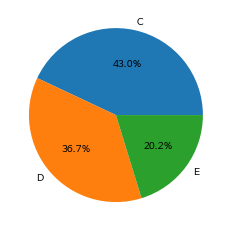

In [ ]:
label=['C','D','E']
plt.pie(ambiguous['연령대'].value_counts(), labels=label, autopct='%.1f%%')

- 기혼 가능성이 mid인 연령대는 C,D,E그룹이 있다.
- 기혼 가능성이 low인 데이터와 비교해 봤을 때 C,D,E 그룹이 하위 연령대 이고 중고생 자녀 스코어를 보면 D 그룹만 mid와 high 스코어를 가지고 있기 때문에 그 중 D그룹이 가장 연령대가 높다고 볼 수 있다. (E < C < D)

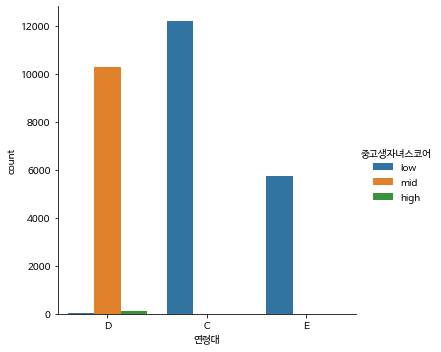

In [ ]:
sns.catplot(x='연령대' ,hue="중고생자녀스코어", kind="count", data=ambiguous, hue_order=['low','mid','high'])

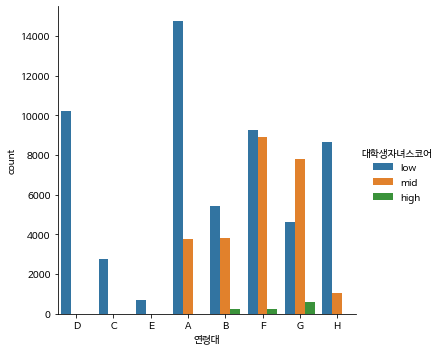

In [ ]:
sns.catplot(x='연령대' ,hue="대학생자녀스코어", kind="count", data=married,
            hue_order=['low','mid','high'],order=['D','C','E','A','B','F','G','H'])

- 기혼 가능성이 높은 데이터 중 대학생 자녀 스코어에 mid이상을 가진 C,D,E 그룹이 없다. = 가장 낮은 연령대

([<matplotlib.patches.Wedge at 0x7f5f58941080>,
 [Text(0.7596851733881006, 0.7955365719652941, '전문몰'),
  Text(-0.745734617447617, 0.8086283944682233, '할인점'),
  Text(-0.9795168180058318, -0.5005465045764783, '디저트'),
  Text(-0.008990413933564124, -1.0999632595942936, '오픈마켓/소셜'),
  Text(0.6503678938166456, -0.8871423801693281, 'a'),
  Text(0.8788819949504405, -0.6614880489864757, 'b'),
  Text(1.016310119784569, -0.4208488332209977, 'c'),
  Text(1.07299342703693, -0.2422500888246372, 'd'),
  Text(1.0939076373041, -0.1156117686386723, 'e'),
  Text(1.0996626203844004, -0.027241903922344688, 'f')],
 [Text(0.4143737309389639, 0.4339290392537968, '25.7%'),
  Text(-0.40676433678960927, 0.44107003334630357, '22.2%'),
  Text(-0.5342819007304537, -0.27302536613262446, '19.1%'),
  Text(-0.0049038621455804315, -0.5999799597787056, '15.6%'),
  Text(0.35474612389998844, -0.48389584372872435, '4.8%'),
  Text(0.4793901790638766, -0.3608116630835322, '4.6%'),
  Text(0.5543509744279467, -0.2295539090296350

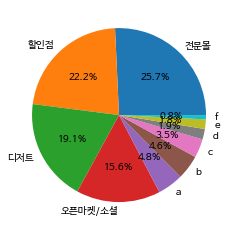

In [ ]:
a=['전문몰','할인점','디저트','오픈마켓/소셜','a','b','c','d','e','f']
plt.pie(mdata['Category'].value_counts(), labels=a, autopct='%.1f%%')

- 전체 연령대로 봤을때 상위 4개의 
- 전문몰, 할인점,디저트,오픈마켓/소셜 
- 카테고리의 카드사용자의 비율이 하위 카테고리 보다 앞도적으로 높다.

- 가장 낮은 연령대의 E, C, D를 비교해보면 상위 4개의 카데고리의 카드 사용자 비율은 유사하다.

In [ ]:
low_age=mdata.loc[mdata['연령대'].isin(['E','C','D']),:]

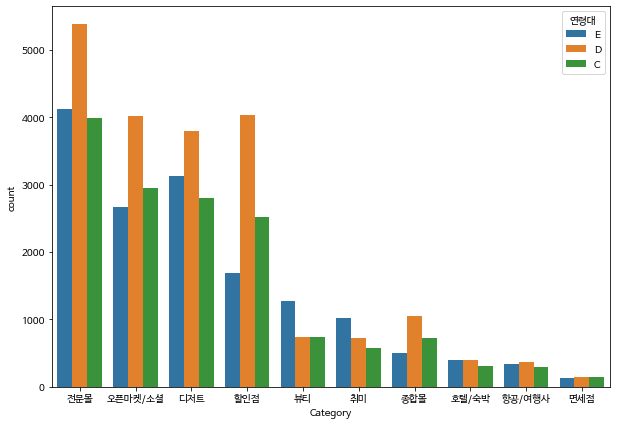

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=low_age, x='Category', hue='연령대',order = ['전문몰','오픈마켓/소셜',
                                                            '디저트','할인점','뷰티','취미','종합몰',
                                                            '호텔/숙박','항공/여행사','면세점'])

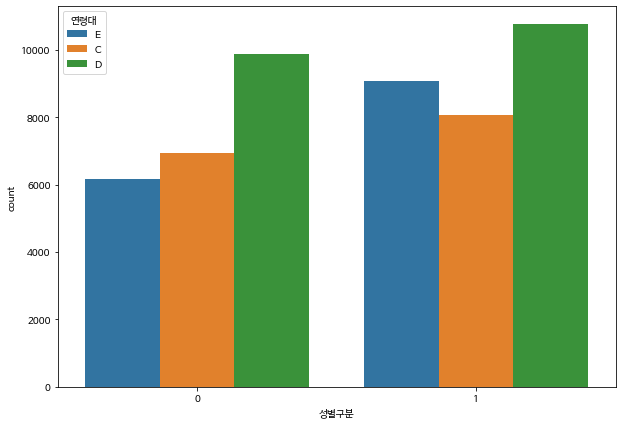

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=low_age, x='성별구분', hue='연령대',hue_order=['E','C','D',])

- 가장 낮은 연령대의 남자와 여자에 카드 사용자 수에는 차이가 있다.
- E그룹이 가장 낮은 나이대로 봤을때 여자의 카드 사용자 비율이 높았다 C그룹으로 갈수록 비슷 해진다.

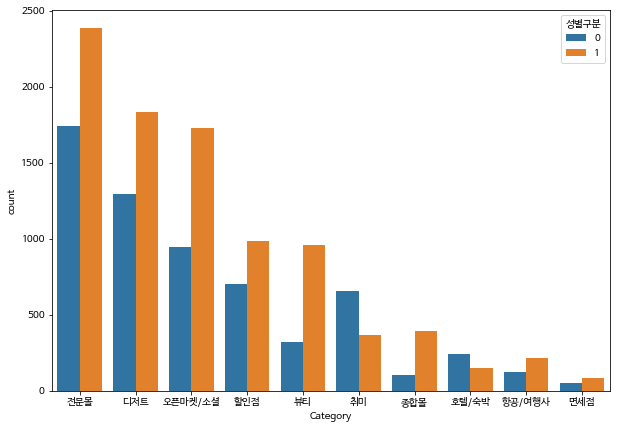

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=twenty, x='Category', hue='성별구분',order = ['전문몰','디저트','오픈마켓/소셜',
                                                            '할인점','뷰티','취미','종합몰',
                                                            '호텔/숙박','항공/여행사','면세점'])

- E 연령대의 카드사용자는 상위 그룹은 비슷하지만 
- 여자들은 뷰티, 남자들은 취미의 카드사용자가 높다.


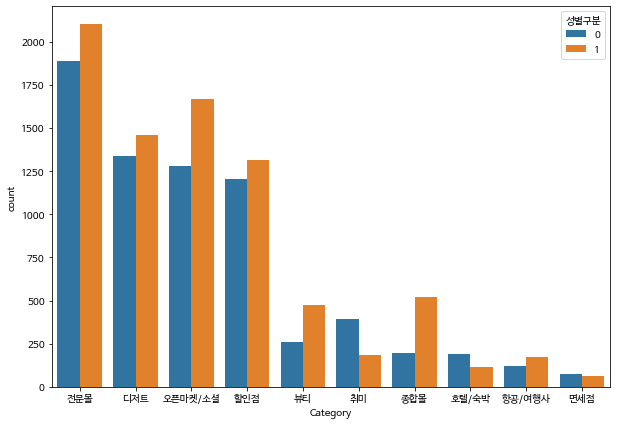

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=twenty2, x='Category', hue='성별구분',order = ['전문몰','디저트','오픈마켓/소셜',
                                                            '할인점','뷰티','취미','종합몰',
                                                            '호텔/숙박','항공/여행사','면세점'])

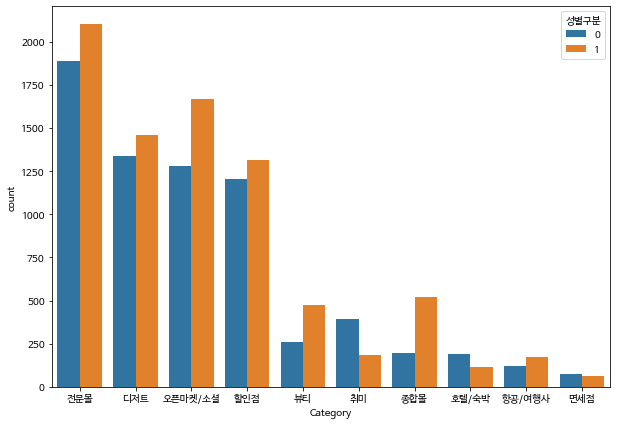

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(data=twenty3, x='Category', hue='성별구분',order = ['전문몰','디저트','오픈마켓/소셜',
                                                            '할인점','뷰티','취미','종합몰',
                                                            '호텔/숙박','항공/여행사','면세점'])

- E그룹을 제외한 나머지 C,D 그룹은 전체 연령대와 비슷한 모습의 그래프를 보인다.